## Homework 6: Putting it all together 

## Table of contents
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Imports

In [20]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

ImportError: cannot import name 'mean_std_cross_val_scores' from 'sklearn.model_selection' (c:\Users\kinzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\__init__.py)

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

TEST SCORE AND METRIC USED:     

We had a test score of 0.82055 using the DecisionTreeClassifier as our metric with hyperparameters set to max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf. 
<br><br>

We observe that there are multiple columns that serve the same purpose at different time points. Of these, we see ordinal encoding present for a good portion of the columns, including pay_x, sex, education, and marriage. Bill, pay, and limit balance amounts present as numeric values. We will be dropping our Sex, Education, Marriage, and age columns for the sake of ethical considerations. Our target column is our default.payment.next.month column. From info(), we see there are 300000 examples, all seemingly non-null, implying a lack of need for imputation. 

In [3]:
#We start by reading in our csv file as a pandas dataframe
df = pd.read_csv("UCI_Credit_Card.csv", header=0)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

In [4]:
#Next, we want to drop any columns from our dataset that we do not want influencing the data for ethical reasons, such as Sex, Education, Marriage, and Age
#We also drop the ID column, as it ultimately is an arbitrary value and we don't need it to influence the data
dropcols = ["ID", "SEX", "EDUCATION", "MARRIAGE"]
df = df.drop(columns=dropcols)
#We also will rename our Pay_0 column to Pay_1, seeing as it jumps from 0 - 2 for some reason
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   AGE                         30000 non-null  int64  
 2   PAY_1                       30000 non-null  int64  
 3   PAY_2                       30000 non-null  int64  
 4   PAY_3                       30000 non-null  int64  
 5   PAY_4                       30000 non-null  int64  
 6   PAY_5                       30000 non-null  int64  
 7   PAY_6                       30000 non-null  int64  
 8   BILL_AMT1                   30000 non-null  float64
 9   BILL_AMT2                   30000 non-null  float64
 10  BILL_AMT3                   30000 non-null  float64
 11  BILL_AMT4                   30000 non-null  float64
 12  BILL_AMT5                   30000 non-null  float64
 13  BILL_AMT6                   300

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [6]:
y_col_name = ["default.payment.next.month"]
train_df, test_df = train_test_split(df, train_size=0.7, random_state=123)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   21000 non-null  float64
 1   AGE                         21000 non-null  int64  
 2   PAY_1                       21000 non-null  int64  
 3   PAY_2                       21000 non-null  int64  
 4   PAY_3                       21000 non-null  int64  
 5   PAY_4                       21000 non-null  int64  
 6   PAY_5                       21000 non-null  int64  
 7   PAY_6                       21000 non-null  int64  
 8   BILL_AMT1                   21000 non-null  float64
 9   BILL_AMT2                   21000 non-null  float64
 10  BILL_AMT3                   21000 non-null  float64
 11  BILL_AMT4                   21000 non-null  float64
 12  BILL_AMT5                   21000 non-null  float64
 13  BILL_AMT6                  

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [7]:
#We utilize the describe() function to provide us with descriptive statistics first
train_df.describe()


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,167880.651429,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,-0.264429,-0.295095,51107.566762,49126.824810,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,130202.682167,9.212644,1.120465,1.194506,1.196123,1.168556,1.137205,1.147992,73444.143025,71400.032096,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-15308.000000,-67526.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3649.250000,2925.750000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22284.000000,21002.500000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66979.750000,63795.250000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


From this, we can see that there is a massive standard deviation in Limit_balance that jumps out in addition to a discrepancy in standard deviation between pay amount and bill amount columns. 
This is indicative of a heavily skewed dataset, one in which the magnitude of some values are so massive that they disproportionately affect the mean, and thus statistics based on the mean, such as standard deviation.
This reflects real life divisions between the rich and the poor. This skewed data reflects a stark divide wherein some starve while the wealth of others is beyond conception.
In other cases, we see this divide due to a large gap in values caused by a strong negative min and a large max (I.e. BILL_AMT columns), due to these columns representing amounts changing

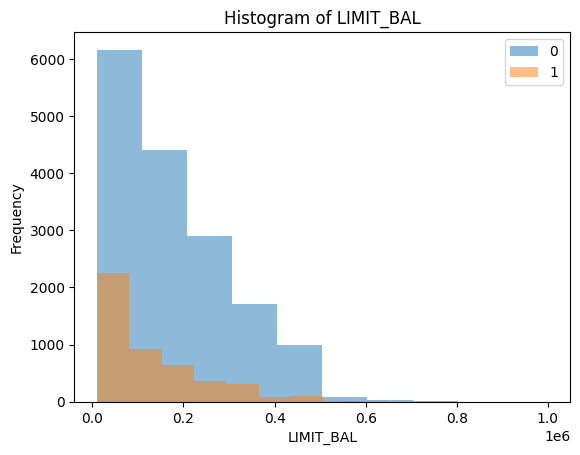

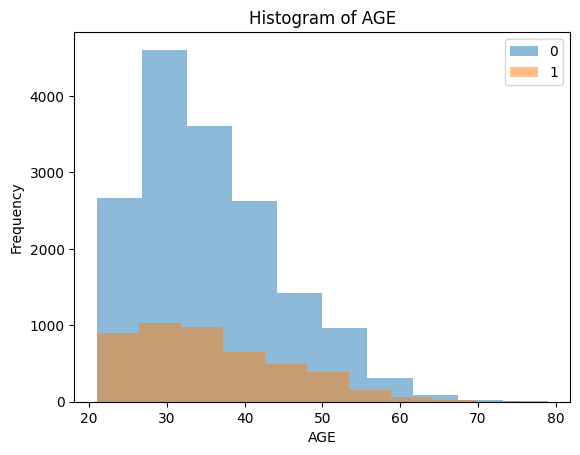

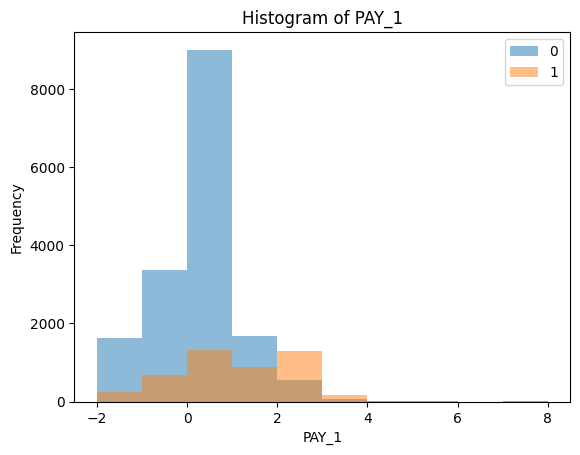

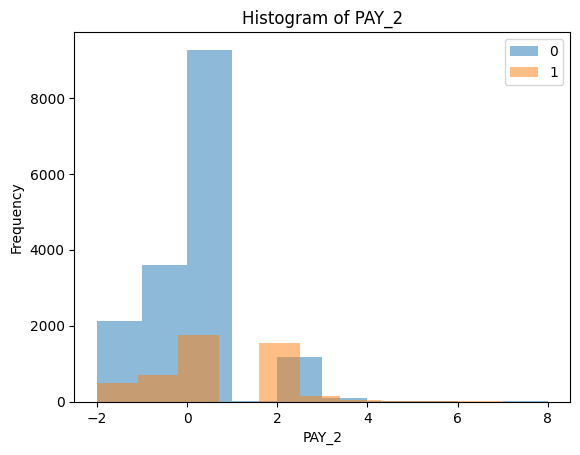

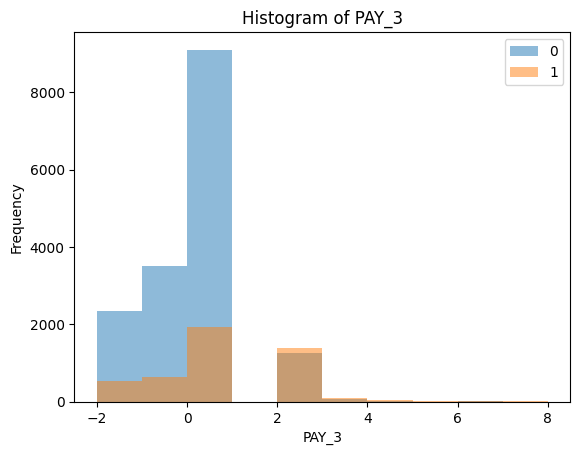

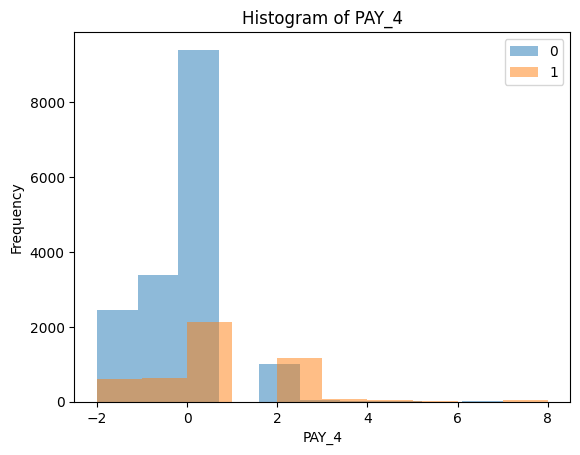

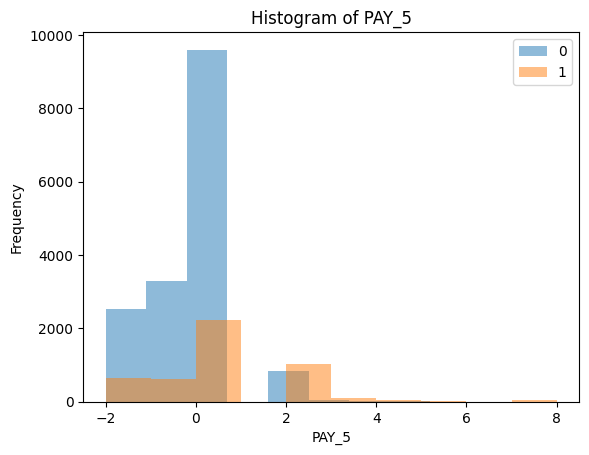

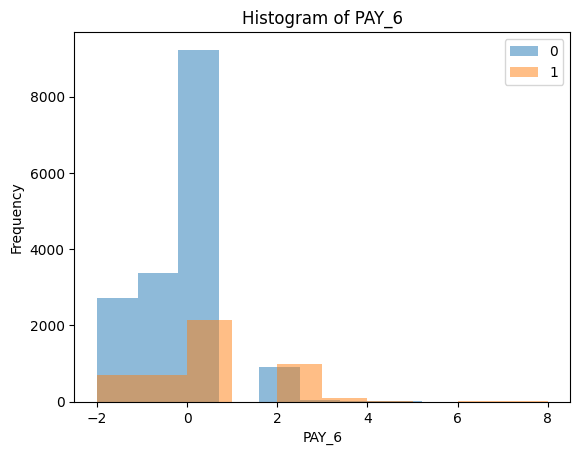

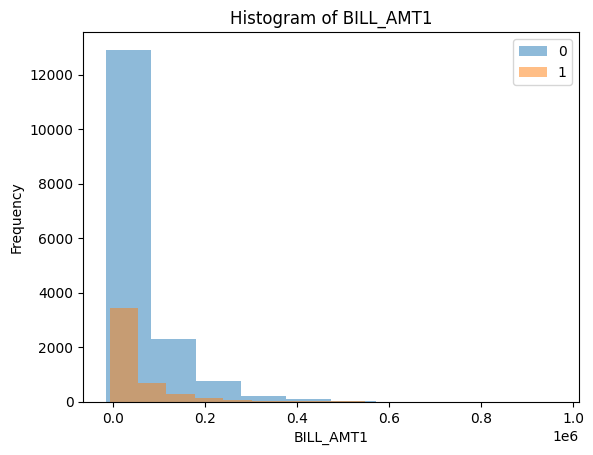

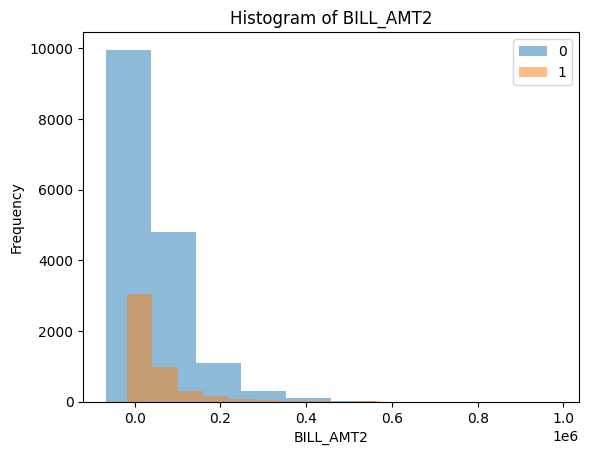

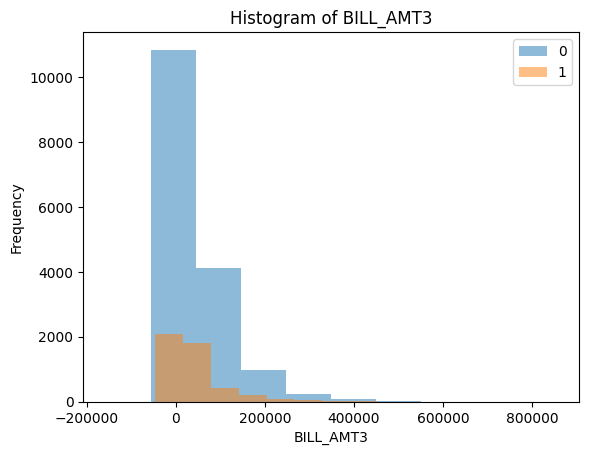

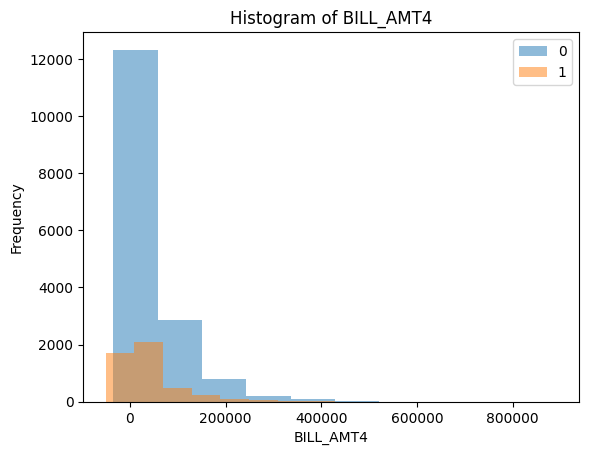

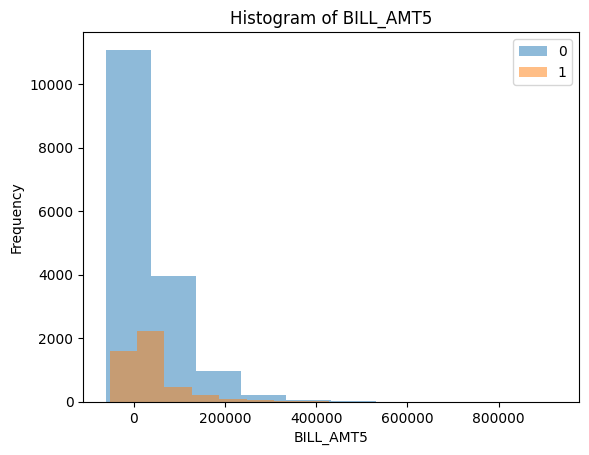

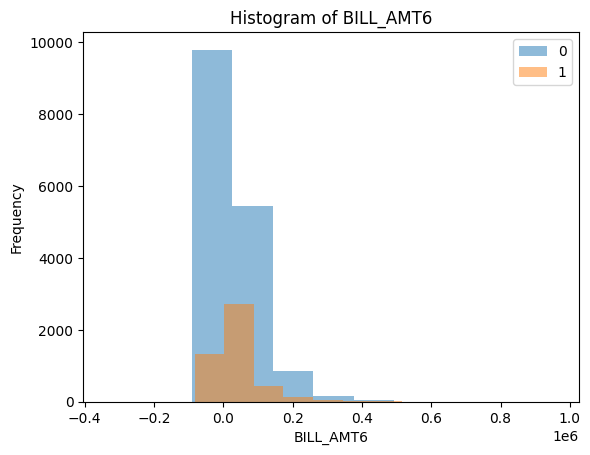

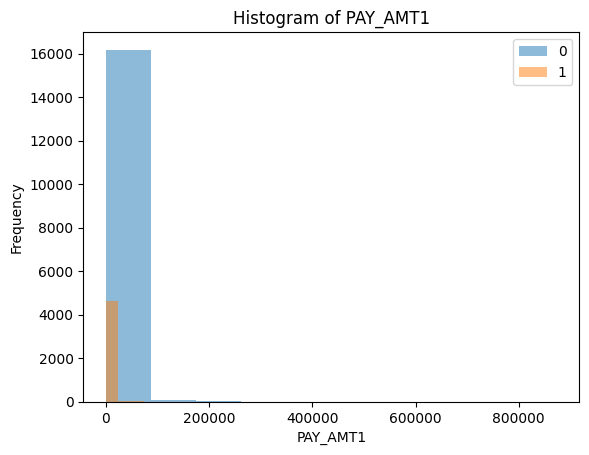

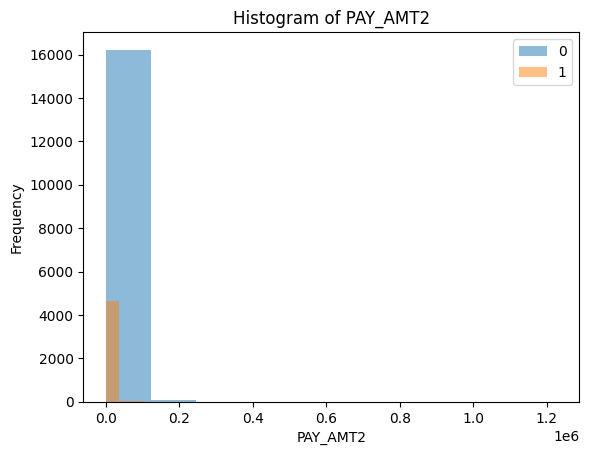

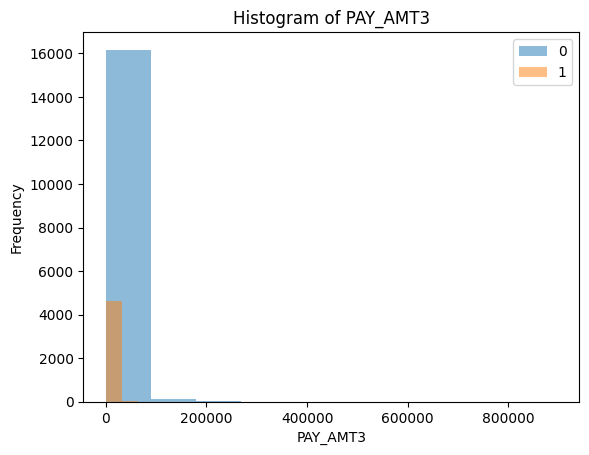

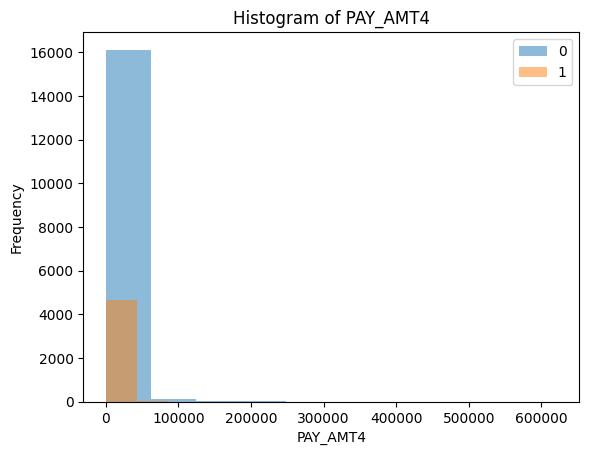

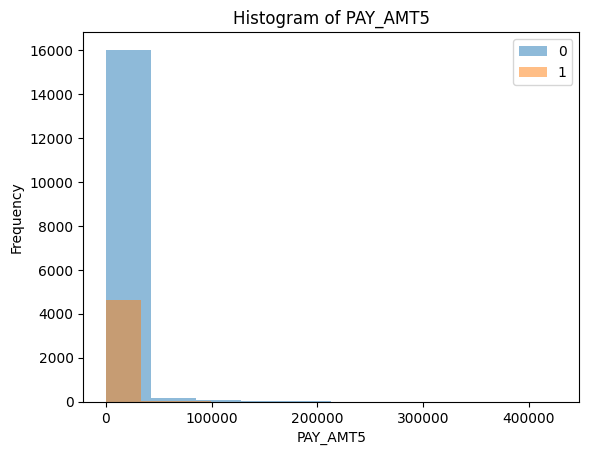

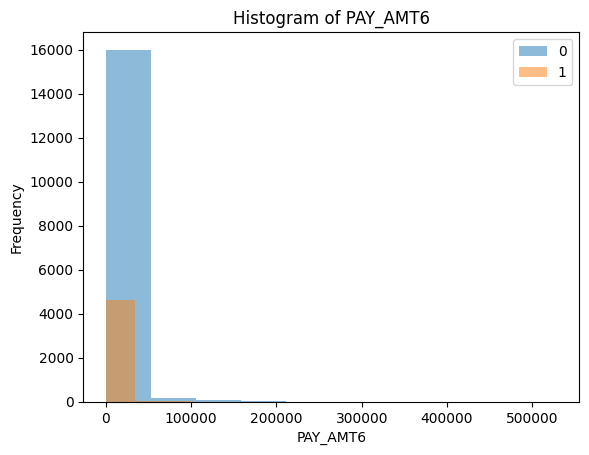

In [8]:
#Next, we are going to display some histograms in order to visualize our data as a function of features. For this, we will utilize the method employed in HW2
#First, we create a list object of all of our columns, skipping ID
features  = list(df.columns[0:20])

for i in range(len(features)):
    featur = features[i]
    axis = train_df.groupby(y_col_name)[featur].plot.hist(bins=10, alpha=0.5, legend=True)
    plt.xlabel(featur)
    plt.title("Histogram of " + featur)
    plt.show()

Clearly this data is heavily skewed right on our numeric metrics, and our categorical metrics don't seem particularly informative as is either. Therefore, we will need to apply a number of transformations downstream. Now we will visualize the total proportion of those who defaulted and those who did not overall. 

<AxesSubplot: xlabel='default.payment.next.month'>

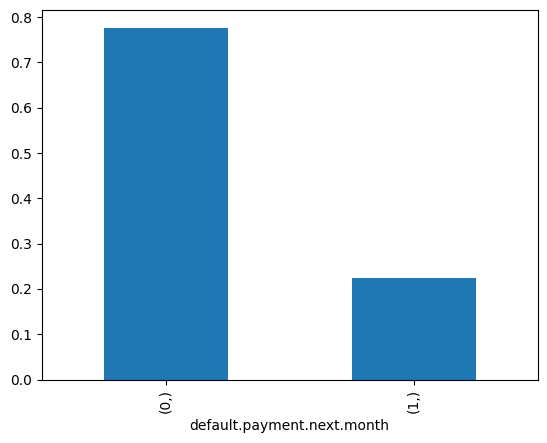

In [9]:
default_counts = train_df[y_col_name].value_counts(normalize=True)
default_counts.plot.bar()

From this we observe that there are far more examples of non-defaulting than defaulting in this dataset, with approximately 78% of examples not defaulting and 22% defaulting. This is something we need to take into account moving forward.

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

We anticipate that age will act differently from our other numeric columns, so we will utilize binning in order to transform our age column

In [10]:
df["AGE"].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

From this, we observe that our lowest age is 21 and our highest age is 79. Knowing this, and that our data is right skewed for this feature, we will bin examples as follows: 21-30, 31-40, 41-50, 51-60, 61-79, Thus extracting 5 new binary features from "AGE".

In [11]:
bins = [21, 30, 40, 50, 60, 79]
group_names = ['21-30', '31-40', '41-50', '51-60', '61-79']
age_bin = pd.cut(train_df['AGE'], bins, labels=group_names)
train_df['age_bin'] = pd.cut(train_df['AGE'], bins, labels=group_names)
train_df=pd.get_dummies(train_df, columns=['age_bin'])
train_df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,age_bin_21-30,age_bin_31-40,age_bin_41-50,age_bin_51-60,age_bin_61-79
16395,320000.0,36,0,0,0,0,0,0,29026.0,28179.0,...,1000.0,3000.0,0.0,7013.0,0,0,1,0,0,0
21448,440000.0,30,-1,-1,-1,0,0,0,777.0,612.0,...,130007.0,3018.0,15000.0,51663.0,0,1,0,0,0,0
20034,160000.0,44,-2,-2,-2,-2,-2,-2,-18.0,-18.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
25755,120000.0,30,0,0,0,0,0,0,101596.0,102860.0,...,4204.0,3017.0,2005.0,1702.0,0,1,0,0,0,0
1438,50000.0,54,1,2,0,0,0,0,48153.0,46885.0,...,1200.0,1500.0,1000.0,1500.0,0,0,0,0,1,0


We see here that our transformation has created our appropriate binary columns for age bins, however we still find ourselves with our redundant numerical age column. We will apply this transformation to the test set and drop the AGE column now.

In [12]:
train_df = train_df.drop(columns=["AGE"])
age_bin = pd.cut(test_df['AGE'], bins, labels=group_names)
test_df['age_bin'] = pd.cut(test_df['AGE'], bins, labels=group_names)
test_df=pd.get_dummies(test_df, columns=['age_bin'])
test_df = test_df.drop(columns=["AGE"])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 25665 to 14757
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   9000 non-null   float64
 1   PAY_1                       9000 non-null   int64  
 2   PAY_2                       9000 non-null   int64  
 3   PAY_3                       9000 non-null   int64  
 4   PAY_4                       9000 non-null   int64  
 5   PAY_5                       9000 non-null   int64  
 6   PAY_6                       9000 non-null   int64  
 7   BILL_AMT1                   9000 non-null   float64
 8   BILL_AMT2                   9000 non-null   float64
 9   BILL_AMT3                   9000 non-null   float64
 10  BILL_AMT4                   9000 non-null   float64
 11  BILL_AMT5                   9000 non-null   float64
 12  BILL_AMT6                   9000 non-null   float64
 13  PAY_AMT1                    

In [13]:
#For downstream ease, we will go ahead and also do this:
target = "default.payment.next.month"

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

We will start by importing column transformer

In [14]:
from sklearn.compose import ColumnTransformer

Next, we will be defining our columnns as numeric and categorical respectively

In [15]:
#First, we will create list objects for our string names of numeric and categorical data columns. 
cat_cols = list(df.columns[2:8])
num_cols = ["LIMIT_BAL"]
temp = list(df.columns[8:20])
for i in range(len(temp)):
    num_cols.append(temp[i])
for i in range(len(cat_cols)):
    print(cat_cols[i])
#We do not include our binned ages in our categorical columns as features in this list are to be transformed, and we have already done that for our age.

PAY_1
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6


In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
 
ct = make_column_transformer(
    (StandardScaler(), num_cols),
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    remainder='passthrough'
)

#ct = ColumnTransformer(transformers=[('standardscaler', StandardScaler(), num_cols), ('onehotencoder', OneHotEncoder(handle_unknown='ignore'), cat_cols)], remainder='passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6'])])

We will now (finally) split into our X and y dataframes. 

In [17]:
X_train = train_df.drop(columns=target)
y_train = train_df[target]
X_test = test_df.drop(columns=target)
y_test = test_df[target]
X_train.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,age_bin_21-30,age_bin_31-40,age_bin_41-50,age_bin_51-60,age_bin_61-79
16395,320000.0,0,0,0,0,0,0,29026.0,28179.0,28695.0,...,5018.0,1000.0,3000.0,0.0,7013.0,0,1,0,0,0
21448,440000.0,-1,-1,-1,0,0,0,777.0,612.0,87426.0,...,87426.0,130007.0,3018.0,15000.0,51663.0,1,0,0,0,0
20034,160000.0,-2,-2,-2,-2,-2,-2,-18.0,-18.0,-18.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
25755,120000.0,0,0,0,0,0,0,101596.0,102860.0,104694.0,...,5502.0,4204.0,3017.0,2005.0,1702.0,1,0,0,0,0
1438,50000.0,1,2,0,0,0,0,48153.0,46885.0,27168.0,...,1400.0,1200.0,1500.0,1000.0,1500.0,0,0,0,1,0


In [18]:
X_test.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,age_bin_21-30,age_bin_31-40,age_bin_41-50,age_bin_51-60,age_bin_61-79
25665,40000.0,-1,0,0,0,-1,0,28991.0,24391.0,13600.0,...,1000.0,0.0,22373.0,680.0,10000.0,1,0,0,0,0
16464,80000.0,0,0,0,0,0,0,75662.0,70073.0,53169.0,...,2106.0,2000.0,1603.0,1903.0,2006.0,0,0,0,1,0
22386,170000.0,2,2,2,2,2,2,155910.0,158819.0,161487.0,...,6500.0,0.0,13000.0,5500.0,1000.0,1,0,0,0,0
10149,200000.0,-2,-2,-2,-2,-2,-2,23570.0,735.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
8729,50000.0,0,0,0,0,0,0,8214.0,8034.0,9044.0,...,1150.0,331.0,341.0,356.0,330.0,0,0,1,0,0


Next, we will make a pipeline:

In [19]:
from sklearn.pipeline import Pipeline, make_pipeline
#We will set ourselves up for later by importing the necessary library for pipelines 

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [23]:
from sklearn.dummy import DummyClassifier


results_dict = {}
strats = ["stratified", "most_frequent", "prior", "uniform"]
#For each of these strategies, we employ a dummy classifier with each strategy as defined in our strats list. Since it is a dummy classifier, there is no need to fit it to a pipeline
for strategy in strats:
    mod_dum = DummyClassifier(strategy=strategy)
    cv_score = cross_val_score(mod_dum, X_train, y_train, cv=5)
    results_dict["dummy " + strategy] = cv_score.mean()
pd.DataFrame(results_dict).T

ValueError: If using all scalar values, you must pass an index

We see here that our most_frequent and prior strategies return the best cross validation scores. This is not surprising, especially given that we saw earlier that approximately 78% of the target values were false, meaning that always predicting "false" would be expected to give roughly 78% accuracy.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

First, we will import the necessary library

In [66]:
from sklearn.linear_model import RidgeClassifier

pipe = make_pipeline(ct, RidgeClassifier())
cvscor = cross_val_score(pipe, X_train, y_train, cv=5)
print("The mean CV score of your RidgeClassifier model is: " + str(cvscor.mean()))
print("The standard deviation of your CV score for RidgeClassifier model is: " + str(cvscor.std()))

The mean CV score of your RidgeClassifier model is: 0.8196190476190475
The standard deviation of your CV score for RidgeClassifier model is: 0.003073550392972378


With no tuning, we get the above mean and standard deviation. This is pretty ok, but with hyperparameter tuning we can likely do better.

In [67]:
alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ridge_grid = {"ridgeclassifier__alpha": alpha_list}
ridge_gr_search = GridSearchCV(pipe, ridge_grid, n_jobs=-1, return_train_score=True)
print(ridge_gr_search)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                 

In [68]:
ridge_gr_search.fit(X_train, y_train)
best_score = ridge_gr_search.best_score_
best_alpha = ridge_gr_search.best_params_["ridgeclassifier__alpha"]
print("Best score is: " + str(best_score))
print("Best alpha is: " + str(best_alpha))


Best score is: 0.8196666666666668
Best alpha is: 0.7


From our grid search, we see that our best alpha value is 0.1, a change from our default alpha value of 1.0. We will now cross validate again using this value, though given our previous best score not much is expected to change.

In [69]:
pipe = make_pipeline(ct, RidgeClassifier(alpha=best_alpha))
cv_scores = cross_val_score(pipe, X_train, y_train, cv=5)
print("The mean cv score is: " + str(cv_scores.mean()))
print("The standard deviation is: " + str(cv_scores.std()))

The mean cv score is: 0.8196666666666668
The standard deviation is: 0.0032632079426689426


In [70]:
cv_sc = cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True)
pd.DataFrame(cv_sc)

,fit_time,score_time,test_score,train_score
0,0.062571,0.006315,0.815238,0.822381
1,0.060272,0.005489,0.817619,0.821607
2,0.019526,0.004177,0.822381,0.820119
3,0.063418,0.006145,0.824286,0.820595
4,0.059714,0.005876,0.818810,0.822143


<!-- END QUESTION -->
From our linear model, our best scores cv scores were 0.81966 and our standard deviation was 0.00326. Our linear model scores fit well with test scores we can possibly say it is underfitting but our training scores werent too low. 
<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

For starters, we will import necessary libraries and begin with our first pass of each model

In [71]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(ct, RandomForestClassifier(random_state=123))
scores = cross_validate(pipe, X_train, np.ravel(y_train), return_train_score=True)
pd.DataFrame(scores)


,fit_time,score_time,test_score,train_score
0,9.002403,0.060536,0.805238,0.993036
1,8.948877,0.064014,0.806190,0.993810
2,2.078227,0.061559,0.818571,0.993690
3,8.877797,0.061543,0.818333,0.992857
4,8.810547,0.059748,0.809286,0.993571


We observe what appears to be quite a bit of overfitting in the random forest model

In [72]:
pipe = make_pipeline(ct, SVC())
scores = cross_validate(pipe, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,7.278372,1.023299,0.813095,0.825714
1,7.184890,1.036131,0.815714,0.824107
2,12.733013,4.175014,0.822143,0.823036
3,7.195013,1.050432,0.822619,0.822143
4,7.169455,1.051961,0.816190,0.824762


The scores from our SVM model are actually pretty good, probably the best so far. Train scores seem to match test scores fairly well here. Score times here seem to be the longest compared to our other models. 

In [73]:
pipe = make_pipeline(ct, DecisionTreeClassifier())
scores = cross_validate(pipe, X_train, np.ravel(y_train), return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.757822,0.006629,0.727619,0.993036
1,0.761585,0.006619,0.723095,0.993810
2,0.309560,0.004678,0.721190,0.993750
3,0.770662,0.006562,0.721667,0.992857
4,0.748388,0.005912,0.724286,0.993631


Our DecisionTreeClassifier model has shown the most overfitting so far, with very high train scores and the lowest overall test scores. Our RandomForestClassifier, the ensemble method, performed similarly with a significant degree of overfitting. Our SVM model on first pass scored very similarly to our tuned RidgeClassifier, though that too was close to its non-tuned best scores. Given that these scores are still better than baseline (i.e. our dummyclassifier), we can say that these are not necessarily underfitting, though we would like better scores. Additonally, our DecisionTreeClassifier had the best score times and fit times compared to the rest of our models. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

We will begin by importing SequentialFeatureSelector, our forward feature selector, and fitting our training data to it

In [74]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs

mod = RidgeClassifier()
sfs1 = sfs(mod, n_features_to_select=5, direction='forward', scoring="accuracy")
sfs1.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RidgeClassifier(), n_features_to_select=5,
                          scoring='accuracy')

Next, we wish to see what we got as far as important features go:

In [75]:
f_names = list(sfs1.get_feature_names_out())
for i in range(len(f_names)):
    print(f_names[i])

PAY_1
PAY_2
PAY_5
PAY_6
BILL_AMT1


From this, we can see that our features Pay_1, Pay_2, Pay_5, and Bill_AMT1 are our most important features when using the Ridge classifier. We will trim a training dataframe down to just these columns in X, and utilize this with our RidgeClassifier to see if we get an improvement in accuracy. 

In [76]:
trim_X_train = X_train[f_names]
trim_num_cols = ["BILL_AMT1"]
trim_cat_cols = ["PAY_1", "PAY_2", "PAY_5", "PAY_6"]
make_column_transformer(
    (StandardScaler(), trim_num_cols),
    (OneHotEncoder(handle_unknown='ignore'), trim_cat_cols)
)

#ct = ColumnTransformer(transformers=[('standardscaler', StandardScaler(), trim_num_cols), ('onehotencoder', OneHotEncoder(handle_unknown='ignore'), trim_cat_cols)], remainder='passthrough')
pipe = make_pipeline(ct, RidgeClassifier(alpha=best_alpha))
cv_scores = cross_validate(pipe, trim_X_train, np.ravel(y_train), return_train_score=True)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_score,train_score
0,0.022226,0.003329,0.813571,0.823631
1,0.017572,0.002838,0.818095,0.822083
2,0.019812,0.002793,0.824762,0.820417
3,0.019983,0.002719,0.826190,0.820536
4,0.019584,0.002757,0.820952,0.821845


We see a modest increase in speed as far as our fit time goes, but our scores fail to improve much. For this reason, we will be abandoning this feature selection as we go forward. 

<!-- END QUESTION -->

<br><br>

In [60]:
#make_column_transformer(
##    (StandardScaler(), num_cols),
#    (OneHotEncoder(handle_unknown='ignore'), cat_cols)
#)

#ct = ColumnTransformer(transformers=[('standardscaler', StandardScaler(), num_cols), ('onehotencoder', OneHotEncoder(handle_unknown='ignore'), cat_cols)], remainder='passthrough')
#ct
#Re-run this block of code in order to ensure that our column transformer is as we want it

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6'])])

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

Seeing as we already optimized alpha for our RidgeClassifier, we will begin by optimizing hyperparameters for our remaining models, starting with our RandomForestClassifier, using RandomizedSearchCV

In [77]:
r_forest_grid = {"randomforestclassifier__n_estimators": [25, 50, 75, 100, 125, 150], 
                 "randomforestclassifier__min_samples_leaf": [1, 2, 3, 4, 5]}

pipe_rand_for = make_pipeline(ct, RandomForestClassifier(random_state=123))

grid_search = RandomizedSearchCV(pipe_rand_for, r_forest_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

best_scr = grid_search.best_score_
best_n_est = grid_search.best_params_["randomforestclassifier__n_estimators"]
best_min_samples_leaf = grid_search.best_params_["randomforestclassifier__min_samples_leaf"]


print("Best score: " + str(best_scr))
print("Best n_estimators: " + str(best_n_est))
print("Best min_samples_leaf: " + str(best_min_samples_leaf))

Best score: 0.8171428571428571
Best n_estimators: 125
Best min_samples_leaf: 5


Utilizing these values, we will run a cross validation with our Random Forest and the best hyperparameters to see if anything improved.

In [78]:
pipe = make_pipeline(ct, RandomForestClassifier(random_state=123, n_estimators=best_n_est, min_samples_leaf=best_min_samples_leaf))

cv_scores = cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_score,train_score
0,2.228217,0.059060,0.813810,0.864524
1,2.219453,0.060554,0.814762,0.861667
2,2.321648,0.061210,0.816905,0.865714
3,2.250346,0.060523,0.823571,0.862798
4,2.237778,0.059365,0.816667,0.864940


For this, we see a very slight improvement in test score and a decrease in training score, which is actually a good thing as this model was heavily overfitting earlier. We still observe some overfitting here after hyperparameter tuning, though much less. That being said, we do not anticipate using the RandomForestClassifier as our final model. Next, we will tune hyperparameters for our DecisionTree classifier.

In [79]:
d_tree_grid = {
    "decisiontreeclassifier__max_depth": [None, 2, 5, 7, 9],
    "decisiontreeclassifier__min_samples_leaf": [1, 2, 3, 4, 5]}

pipe_d_tree = make_pipeline(ct, DecisionTreeClassifier())

d_tree_rand_search = RandomizedSearchCV(pipe_d_tree, d_tree_grid, cv=5, return_train_score=True)
d_tree_rand_search.fit(X_train, y_train)

best_score = d_tree_rand_search.best_score_
best_max_depth = d_tree_rand_search.best_params_["decisiontreeclassifier__max_depth"]
best_min_samples_leaf = d_tree_rand_search.best_params_["decisiontreeclassifier__min_samples_leaf"] 

print("Best score: " + str(best_score))
print("Best max depth: " + str(best_max_depth))
print("Best min samples leaf: " + str(best_min_samples_leaf))

Best score: 0.8150952380952381
Best max depth: 5
Best min samples leaf: 1


This looks promising so far, though our score hasn't improved much. Let's see what happens when we use these best parameters in a cross validation: 

In [80]:
pipe = make_pipeline(ct, DecisionTreeClassifier(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf))

cv_scores = cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_score,train_score
0,0.083872,0.003827,0.812381,0.823393
1,0.084545,0.003154,0.814048,0.821071
2,0.083100,0.003849,0.815952,0.821250
3,0.082892,0.003647,0.817143,0.821488
4,0.084255,0.003346,0.815952,0.821548


These results are on par with our tuned Ridge classifier and our SVM model, with much lower fit time and score times to boot! Overfitting has also been fixed from earlier here it seems, though our actual test scores still haven't improved beyond our best much. Next, we will try the SVM model:

In [81]:
p_grid = {
    "svc__C": [0.001, 0.01, 0.1, 1.0, 10]
}

pipe_svc = make_pipeline(ct, SVC())

rand_search = RandomizedSearchCV(pipe_svc, p_grid, cv=5, return_train_score=True, n_iter=5)
rand_search.fit(X_train, y_train)

best_score = rand_search.best_score_
best_C = rand_search.best_params_["svc__C"]

print("Best score: " + str(best_score))
print("Best C: " + str(best_C))

Best score: 0.7767619047619047
Best C: 0.001


We had to focus on C to the exception of gamma due to time. We see a lack of major improvement in our best score, but we have a best C regardless to test with cross-validation

In [82]:
pipe = make_pipeline(ct, SVC(C=best_C))

cv_scores = cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_score,train_score
0,8.326663,3.753736,0.776905,0.776726
1,8.388570,3.961705,0.776905,0.776726
2,8.215259,3.745992,0.776667,0.776786
3,8.274826,3.958169,0.776667,0.776786
4,8.245634,3.764318,0.776667,0.776786


We fail to notice a significant increase in test score, though our train score has improved, indicating a slight increase in overfitting. Additionally, our fit and score times have increased, indicating that the optimization here may not have actually improved anything, and may have even made it worse. Overall, our best results seem to be with our optimized DecisionTreeClassifier, as it produces the same test scores with a lack of overfitting and good computational efficiency (low time). 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

We will be using eli5, which we must import, to analyze feature importances of our RandomForestClassifier:

In [112]:
column_names = (
    num_cols
    + ct.named_transformers_["onehotencoder"].get_feature_names().tolist()
    + passthrough_feats
)
column_names = np.asarray(column_names)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [114]:
import eli5

pipe_rf = make_pipeline(ct, RandomForestClassifier(random_state=123))
pipe_rf.fit(X_train, np.ravel(y_train))

eli5.explain_weights(
    pipe_rf.named_steps["randomforestclassifier"], feature_names=column_names
)
data = {
    "Importance": pipe_rf.named_steps["randomforestclassifier"].feature_importances_,
}
pd.DataFrame(data=data, index=column_names,).sort_values(
    by="Importance", ascending=False
)[:10]

,Importance
LIMIT_BAL,0.069467
BILL_AMT1,0.065597
BILL_AMT2,0.058840
BILL_AMT3,0.054972
PAY_AMT1,0.054750
BILL_AMT6,0.054202
BILL_AMT5,0.053401
BILL_AMT4,0.052797
x0_2,0.052125
PAY_AMT2,0.051162


<!-- END QUESTION -->
Our feature importance results shows us that mostly every feature is significant and is equally as important with some minor outliers. LIMIT_BAL and BILL_AMT1 were slightly higher than the others but with a difference of 0.01 this difference was deemed not as significant. 
<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Type your answer here, replacing this text._

In [110]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8205555555555556

In [93]:
passthrough_feats = ['age_bin_21-30','age_bin_31-40','age_bin_41-50','age_bin_51-60','age_bin_61-79']
column_names = []
for i in range(len(num_cols)):
    column_names.append(num_cols[i])
for i in range(len(passthrough_feats)):
    column_names.append(passthrough_feats[i])

ohe_list = ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
for i in range(len(ohe_list)):
    column_names.append(ohe_list[i])

<!-- END QUESTION -->

<br><br>

In [94]:
import shap
ct.fit_transform(X_train, y_train)

<21000x82 sparse matrix of type '<class 'numpy.float64'>'
	with 419959 stored elements in Compressed Sparse Row format>

In [95]:
X_train_enc = pd.DataFrame(
    data = ct.transform(X_train).toarray(),
    columns=column_names,
    index=X_train.index,
)
X_train_enc.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
16395,1.168355,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,-0.039546,-0.040229,-0.234603,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21448,2.090017,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,-0.297166,3.739796,6.785208,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20034,-0.060527,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,-0.333097,-0.270403,-0.289017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25755,-0.367748,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,-0.115517,-0.018028,-0.060260,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1438,-0.905384,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,-0.333097,-0.206185,-0.223720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:
X_test_enc = pd.DataFrame(
    data=ct.transform(X_test).toarray(),
    columns=column_names,
    index=X_test.index,
)

In [97]:
pipe = make_pipeline(ct, DecisionTreeClassifier(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf))
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'BILL_AMT1',
                                                   'BILL_AMT2', 'BILL_AMT3',
                                                   'BILL_AMT4', 'BILL_AMT5',
                                                   'BILL_AMT6', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PAY_1', 'PAY_2', 'PAY_3',
         

In [98]:
explainer = shap.Explainer(pipe.predict, X_test)
train_shap_values = explainer(X_test)



Permutation explainer: 9001it [09:03, 16.29it/s]                                


In [102]:
shap.initjs()

In [103]:
shap.plots.force(train_shap_values[0])

In [104]:
shap.plots.force(train_shap_values[1])

In [115]:
shap.plots.force(train_shap_values[10])

In [118]:
#Shap results here are for a few different points. 
#In the middle you see the "class" it predicts(i.e. 1 or 0) for each example indexed by their shap_value position. 
#In two of these examples, a 0 is predicted, and we see strong blue predictive features which influence its prediction. In the example which predicts a '1', 
#we see primarily red positive predictive features which show their influence by predicting a '1'.

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook 

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Type your answer here, replacing this text._

In [109]:
# We created a table with the results from the cross validation train, test, best fit time, worst fit time, and best score times. 
df = pd.read_csv('/Users/brianyoon/Desktop/hw_6_table_results.csv')
df


,Models,Best CV Train Score,Best CV Score,Best Fit Time,Worst Fit Time,Best Score Time
0,DecisionTreeClassifier,0.993810,0.727619,0.033697,1.071056,0.010522
1,DecisionTreeClassifier (Optimized),0.825119,0.821667,0.121458,0.134511,0.010991
2,RandomForestClassifier,0.993810,0.818571,3.095510,14.013200,0.076001
3,RandomForestClassifier (Optimized),0.862857,0.821667,1.232877,4.639542,0.040115
4,SVC,0.825714,0.822619,10.570606,12.105770,1.414463
5,SVC (Optimized),0.840952,0.827857,15.293669,16.219306,1.396852
6,RidgeClassifier (Optimized),0.822679,0.824286,0.044928,0.192210,0.010458
7,Trimmed Ridge,0.823571,0.825952,0.022592,0.032103,0.003989


<!-- END QUESTION -->
We have chosen our optimized decision tree classifier as our model of choice, and it scored as it was predicted to in the cross validations. All of our models seemed to converge on the same cross validation scores. It is possible that with different pre-processing and different hyperparameter optimization, we would have had different results. What we have is partially a result of time and computational resources as well, as we would have used, for example, GridSearchCV for all of our hyperparameter optimizations if given infinite time and computational resources. A final note is that we dropped a few columns that others may choose not to drop early on due to ethical reasons (i.e. not wanting the model to make predictions based on sex or education for example). It is entirely possible that these values would have led to different, or even more accurate results, but we would have to assume as much as overfitting, or we would be creating a prejudiced program. We debated dropping age as well, but eventually settled on binning it as age brackets are a relatively common practice. From this, we were able to generate a fast model that predicts with roughly 82% accuracy, a modest improvement over baseline, while making an effort to avoid the use of data that could be discriminatory.
<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

<!-- END QUESTION -->
Brian: Never Violate the Golden Rule :) My biggest takeaway is understanding the data that youre working with. Especially with large datasets; filtering and processing your features can greatly impact your model. Being able to interpret feature weights and class imbalances was something I did not fully understand before. 

Kinzie: My biggest takeaway from supervised learning is that being a good citizen with your data is paramount to safe, effective, and ethical usage of machine learning. By not understanding the data and not caring to work with it, we are likely to see overfitting models that fail in real life deployment making predictions that important real life decisions, such as insurance coverage or home approval, hinge on. If we understand our data and how our models take it in and work with it, we can minimize this harm and maximize the benefit we get from machine learning.
<br><br>

Congratulations on finishing this project. This was a tricky one but you did it!